**Venda de veículos seminovos**

- Importação de bibliotecas
- Carga do dataset
- Informações gerais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('./dataset/vendas_loja_seminovos.csv', sep=';')
df.drop('CPF', axis=1, inplace=True)

In [3]:
df.head(3)

,ID,Nome Completo,Idade,Sexo,Estado Civil,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento
0,1,Luigi Silva,53,Masculino,Viúvo,monteirovalentim@example.org,+55 21 0592 1284,Azevedo de da Rosa,SP,Toyota,Yaris,2021,Cinza,80028.52,2017-08-31,À vista
1,2,Ester da Rocha,63,Feminino,Solteiro,santoshenry@example.net,(084) 2407 2800,Costela,PR,Hyundai,HB20S,2016,Cinza,103668.13,2022-01-01,Consórcio
2,3,Maria Luiza Nogueira,25,Feminino,Solteiro,zgoncalves@example.net,+55 81 2567 8847,Sá Alegre,MG,Ford,Ecosport,2017,Preto,229867.69,2018-02-17,À vista


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10950 non-null  int64  
 1   Nome Completo    10950 non-null  object 
 2   Idade            10950 non-null  int64  
 3   Sexo             10950 non-null  object 
 4   Estado Civil     10950 non-null  object 
 5   E-mail           10950 non-null  object 
 6   Telefone         10950 non-null  object 
 7   Cidade           10950 non-null  object 
 8   Estado           10950 non-null  object 
 9   Marca            10950 non-null  object 
 10  Modelo           10950 non-null  object 
 11  Ano_fabricacao   10950 non-null  int64  
 12  Cor              10950 non-null  object 
 13  Valor_venda      10950 non-null  float64
 14  Data_venda       10950 non-null  object 
 15  Forma_pagamento  10950 non-null  object 
dtypes: float64(1), int64(3), object(12)
memory usage: 1.3+ MB


In [5]:
df.shape

(10950, 16)

**Tratamento dos dados**
- verificação de dados nulos
- verificação dos labels
- contagem de dados nulos
- converter os dados para os tipos adequados

In [6]:
# df.fillna() # preencher onde for null, fillna(value=valor, inplace=True) atualiza para o valor desejado e altera no dataset
# df.dropna() # remover null
df.isna() # or df.isnull()

,ID,Nome Completo,Idade,Sexo,Estado Civil,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.columns

Index(['ID', 'Nome Completo', 'Idade', 'Sexo', 'Estado Civil', 'E-mail',
       'Telefone', 'Cidade', 'Estado', 'Marca', 'Modelo', 'Ano_fabricacao',
       'Cor', 'Valor_venda', 'Data_venda', 'Forma_pagamento'],
      dtype='object')

In [8]:
df.isnull().sum()

ID                 0
Nome Completo      0
Idade              0
Sexo               0
Estado Civil       0
E-mail             0
Telefone           0
Cidade             0
Estado             0
Marca              0
Modelo             0
Ano_fabricacao     0
Cor                0
Valor_venda        0
Data_venda         0
Forma_pagamento    0
dtype: int64

In [9]:
df_processed = df

In [10]:
cols_string = [
    'Nome Completo', 'Sexo', 'Estado Civil', 'E-mail',
    'Telefone', 'Cidade', 'Estado', 'Marca', 'Modelo', 'Ano_fabricacao',
    'Cor', 'Forma_pagamento'
]

# Converte coluna de data
df_processed['Data_venda'] = pd.to_datetime(df_processed['Data_venda'])

# Converte colunas string
df_processed[cols_string] = df_processed[cols_string].astype('string')

In [11]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               10950 non-null  int64         
 1   Nome Completo    10950 non-null  string        
 2   Idade            10950 non-null  int64         
 3   Sexo             10950 non-null  string        
 4   Estado Civil     10950 non-null  string        
 5   E-mail           10950 non-null  string        
 6   Telefone         10950 non-null  string        
 7   Cidade           10950 non-null  string        
 8   Estado           10950 non-null  string        
 9   Marca            10950 non-null  string        
 10  Modelo           10950 non-null  string        
 11  Ano_fabricacao   10950 non-null  string        
 12  Cor              10950 non-null  string        
 13  Valor_venda      10950 non-null  float64       
 14  Data_venda       10950 non-null  datet

**Criação de uma coluna data**

In [12]:
df_processed['Ano'] = df_processed['Data_venda'].dt.year
grafico_linha = df_processed.groupby('Ano')['Valor_venda'].sum()
grafico_linha

Ano
2017    1.346665e+08
2018    1.915563e+08
2019    1.895375e+08
2020    1.986972e+08
2021    1.882750e+08
2022    1.968196e+08
2023    1.933977e+08
2024    1.900273e+08
2025    5.907306e+07
Name: Valor_venda, dtype: float64

**Vendas por ano**

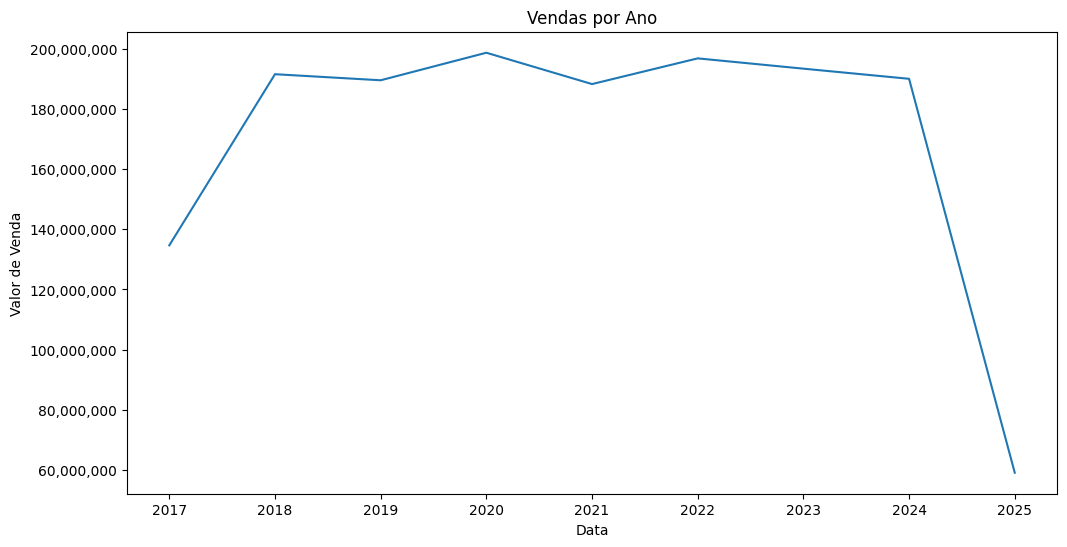

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(grafico_linha.index, grafico_linha.values)
plt.xlabel('Data')
plt.ylabel('Valor de Venda')
plt.title('Vendas por Ano')
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

In [14]:
grafico_barras = df_processed.groupby(['Marca'])['Valor_venda'].sum()
grafico_barras
periodo_vendas = f'{df_processed['Ano'].min()} - {df_processed['Ano'].max()}'

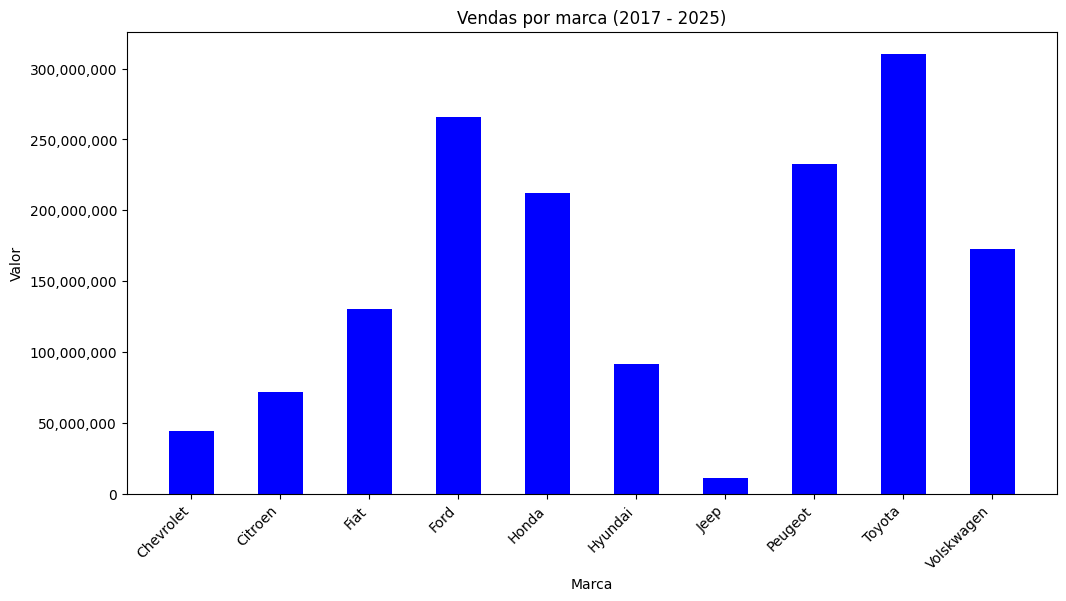

In [15]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
plt.bar(grafico_barras.index, grafico_barras.values, width=0.5, color='blue', align='center')
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(grafico_barras.index)
plt.ylabel('Valor')
plt.xlabel('Marca')
plt.title(f'Vendas por marca ({periodo_vendas})')
plt.show()

In [16]:
periodo_vendas

'2017 - 2025'

In [17]:
toyota = df_processed[df_processed['Marca'] == 'Toyota']

In [18]:
toyota

,ID,Nome Completo,Idade,Sexo,Estado Civil,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento,Ano
0,1,Luigi Silva,53,Masculino,Viúvo,monteirovalentim@example.org,+55 21 0592 1284,Azevedo de da Rosa,SP,Toyota,Yaris,2021,Cinza,80028.52,2017-08-31,À vista,2017
6,7,Aylla Garcia,37,Feminino,Casado,jda-cunha@example.org,21 5334-5818,Rios de Jesus,AP,Toyota,Yaris,2022,Cinza,180325.54,2019-11-02,Financiamento,2019
9,10,Rodrigo da Rosa,45,Masculino,Divorciado,valentina90@example.org,(084) 4410 3574,Pinto de Sousa,AL,Toyota,Corolla,2023,Preto,222721.67,2017-05-24,Consórcio,2017
23,24,Evelyn Nascimento,52,Feminino,Viúvo,ana-cecilia21@example.net,+55 (051) 5381-1030,Câmara,PB,Toyota,Camry,2018,Azul,94182.24,2021-07-21,À vista,2021
25,26,Maria Helena Viana,57,Feminino,Casado,lucas26@example.com,+55 31 8121 8450,da Luz,RJ,Toyota,Yaris,2022,Cinza,67416.01,2022-09-14,Consórcio,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10931,10932,Gabriela Silva,41,Feminino,Viúvo,bernardonunes@example.net,+55 (041) 0997-8001,Cavalcanti Alegre,RR,Toyota,Yaris,2017,Preto,57842.23,2024-09-14,Financiamento,2024
10932,10933,Gabrielly Jesus,65,Feminino,Casado,luizacostela@example.net,(021) 7664 9021,da Cunha,AC,Toyota,Hilux,2019,Vermelho,144067.66,2020-09-04,À vista,2020
10939,10940,Maria Eduarda Campos,26,Feminino,Casado,pachecoyago@example.net,61 8787 3338,das Neves Alegre,TO,Toyota,Corolla Cross,2022,Cinza,134557.32,2022-04-26,À vista,2022
10941,10942,Valentina da Paz,58,Feminino,Divorciado,qda-luz@example.org,0800 897 3377,Farias,AL,Toyota,Etios,2022,Preto,190922.00,2020-08-08,Consórcio,2020


In [19]:
formas_pagamento = df_processed['Forma_pagamento'].unique()

In [20]:
formas_pagamento

<StringArray>
['À vista', 'Consórcio', 'Financiamento', 'Leasing']
Length: 4, dtype: string

In [21]:
df_pagamento = toyota.groupby(['Forma_pagamento', 'Ano'])['Valor_venda'].sum().unstack()
df_pagamento

Ano,2017,2018,2019,2020,2021,2022,2023,2024,2025
Forma_pagamento,,,,,,,,,
Consórcio,10099007.24,14810593.60,13794792.83,16288894.27,12203458.40,13371964.01,15658963.58,13202286.80,4736157.56
Financiamento,8672254.55,12187495.28,12855614.14,14256841.22,12325145.26,12131506.70,10044750.27,10980451.35,4082935.47
Leasing,975547.09,1518022.43,725854.90,913492.99,608609.36,697397.02,1376937.03,1270592.03,137573.51
À vista,9461135.59,12156879.63,11601462.70,12502398.79,11193637.42,10722613.03,8943237.45,10302154.44,3689224.04


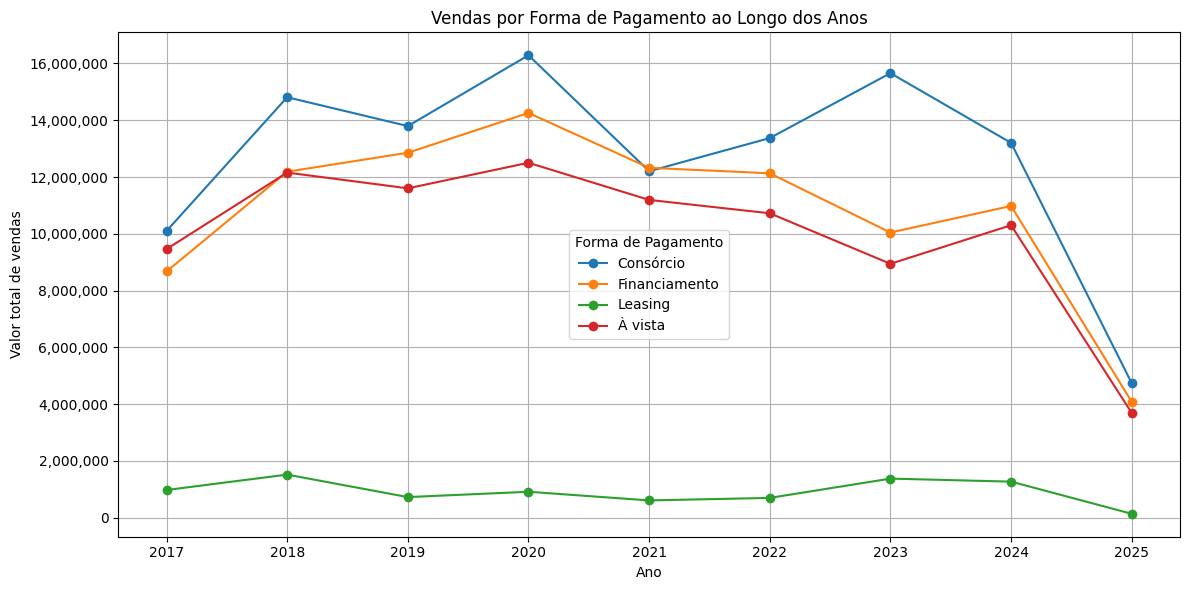

In [22]:
plt.figure(figsize=(12, 6))

for forma in df_pagamento.index:
    plt.plot(df_pagamento.columns, df_pagamento.loc[forma], marker='o', label=forma)

formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Vendas por Forma de Pagamento ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Valor total de vendas')
plt.legend(title='Forma de Pagamento')
plt.grid(True)

plt.tight_layout()
plt.show()


**Média Venda e Idade**

In [23]:
toyota['Valor_venda'].mean()

np.float64(142561.92928374658)

In [24]:
toyota['Idade'].mean()

np.float64(44.3801652892562)

In [25]:
toyota['Valor_venda'].median()

np.float64(142746.005)

In [26]:
toyota['Idade'].median()

np.float64(45.0)

**Percentil Venda e Idade**

In [27]:
toyota['Valor_venda'].quantile()

np.float64(142746.005)

In [28]:
toyota['Idade'].quantile()

np.float64(45.0)

**Desvio Padrão de Vendas e Idade**

In [29]:
toyota['Valor_venda'].std()

np.float64(63332.73163682844)

In [30]:
toyota['Idade'].std()

np.float64(15.488274390993364)

**Distribuição de frequência das idades**

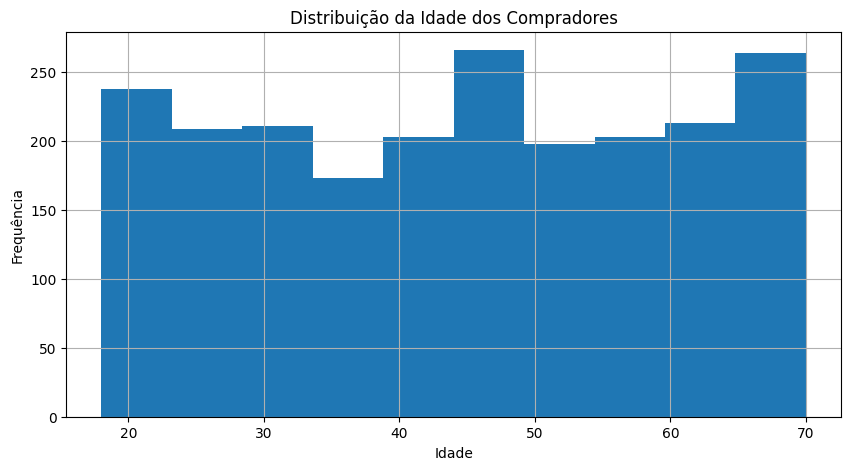

In [31]:
plt.figure(figsize=(10,5))
plt.hist(toyota['Idade'], bins=10)  # pode ajustar o nº de bins
plt.title('Distribuição da Idade dos Compradores')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)

plt.show()


In [32]:
idades = toyota[['Idade', 'Valor_venda']].copy()

todas_idades = idades['Idade'].sort_values(ascending=True).unique()

todas_idades

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])

**Gráfico de Correlação**

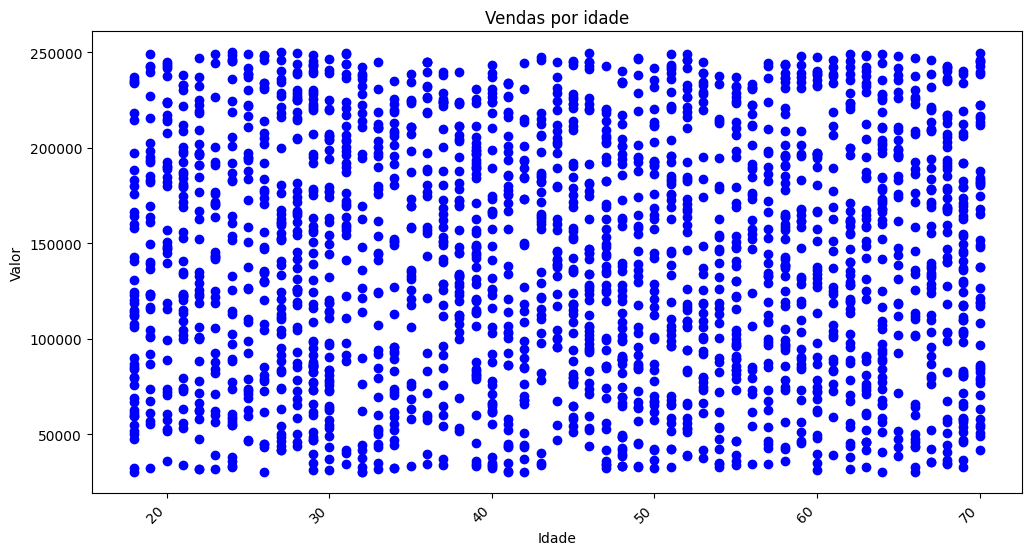

In [33]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
plt.scatter(idades['Idade'], idades['Valor_venda'], color='blue')
plt.ylabel('Valor')
plt.xlabel('Idade')
plt.title(f'Vendas por idade')
plt.show()

In [34]:
idades.corr()

,Idade,Valor_venda
Idade,1.000000,-0.003106
Valor_venda,-0.003106,1.000000


**Regra de Sturges**

In [35]:
n = idades['Idade'].count()
n

np.int64(2178)

In [36]:
k = int(np.round(1 + 3.3322 * np.log10(n)))
k

12

**Amplitude Total**

In [37]:
idade_minima = idades['Idade'].min()
idade_maxima = idades['Idade'].max()

amplitude = idade_maxima - idade_minima
amplitude

np.int64(52)

**Amplitude de Classe**

In [38]:
amplitude_classe = int(np.round(amplitude / k))
amplitude_classe

4

In [39]:
valor = idade_minima

bins = [valor]
labels = []

for i in range(0, k+1):
    labels.append(valor)
    valor += amplitude_classe
    bins.append(valor)
    labels[i] = f'{labels[i]} - {valor}'

In [40]:
bins

[np.int64(18),
 np.int64(22),
 np.int64(26),
 np.int64(30),
 np.int64(34),
 np.int64(38),
 np.int64(42),
 np.int64(46),
 np.int64(50),
 np.int64(54),
 np.int64(58),
 np.int64(62),
 np.int64(66),
 np.int64(70)]

In [41]:
labels

['18 - 22',
 '22 - 26',
 '26 - 30',
 '30 - 34',
 '34 - 38',
 '38 - 42',
 '42 - 46',
 '46 - 50',
 '50 - 54',
 '54 - 58',
 '58 - 62',
 '62 - 66',
 '66 - 70']

In [42]:
idades['Grupo_idade'] = pd.cut(idades['Idade'], bins= bins, labels= labels)

In [43]:
idades

,Idade,Valor_venda,Grupo_idade
0,53,80028.52,50 - 54
6,37,180325.54,34 - 38
9,45,222721.67,42 - 46
23,52,94182.24,50 - 54
25,57,67416.01,54 - 58
...,...,...,...
10931,41,57842.23,38 - 42
10932,65,144067.66,62 - 66
10939,26,134557.32,22 - 26
10941,58,190922.00,54 - 58


In [44]:
grafico_idades = idades.groupby('Grupo_idade', observed=False)['Valor_venda'].sum()

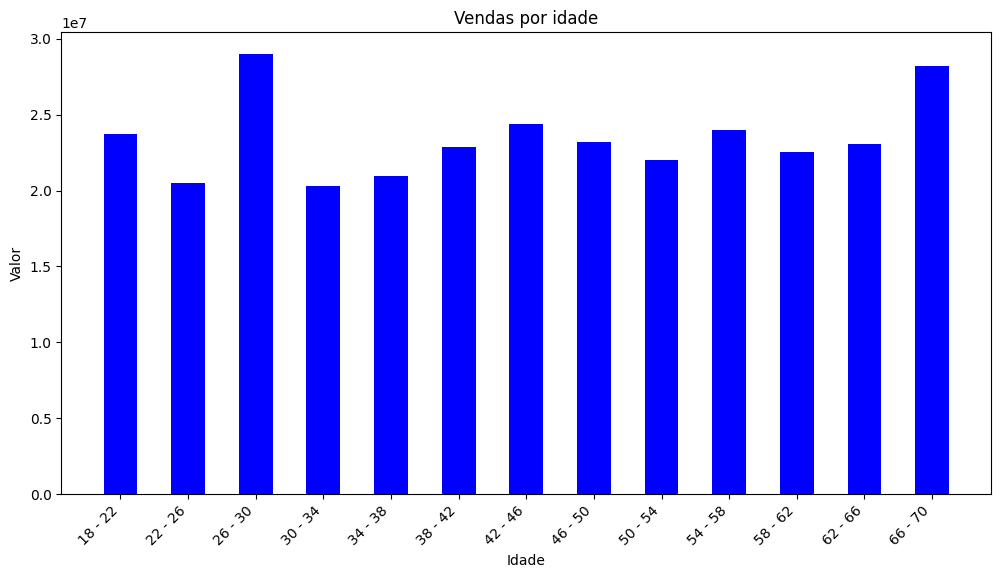

In [45]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
plt.bar(grafico_idades.index, grafico_idades.values, width=0.5, color='blue', align='center')
plt.ylabel('Valor')
plt.xlabel('Idade')
plt.title(f'Vendas por idade')
plt.show()